In [2]:
source('../../function.r')

In [3]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Attaching SeuratObject



In [4]:
pw29.control <- read.table('./data/GSM4483741_PW029-701.cts.txt.gz',header = TRUE,stringsAsFactors = FALSE)

In [6]:
pw29.control%>%dim

[1] 60725  1698

In [7]:
#mat <- pw29.control%>%select(!gene)%>%column_to_rownames('gid')
# remove duplicated gene names
mat <- pw29.control[which(!(pw29.control%>%pull(gene)%>%duplicated)),]%>%
        select(!gid)%>%`row.names<-`(., NULL) %>%column_to_rownames('gene')

In [8]:
mat.seurat <- CreateSeuratObject(counts = mat, project = "pc9", min.cells = 25, min.features = 150)
mat.seurat

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
12639 features across 1675 samples within 1 assay 
Active assay: RNA (12639 features, 0 variable features)

In [9]:
mat.seurat[["percent.mt"]] <- PercentageFeatureSet(mat.seurat, pattern = "^MT-")

In [10]:
options(repr.plot.width=15, repr.plot.height=8)

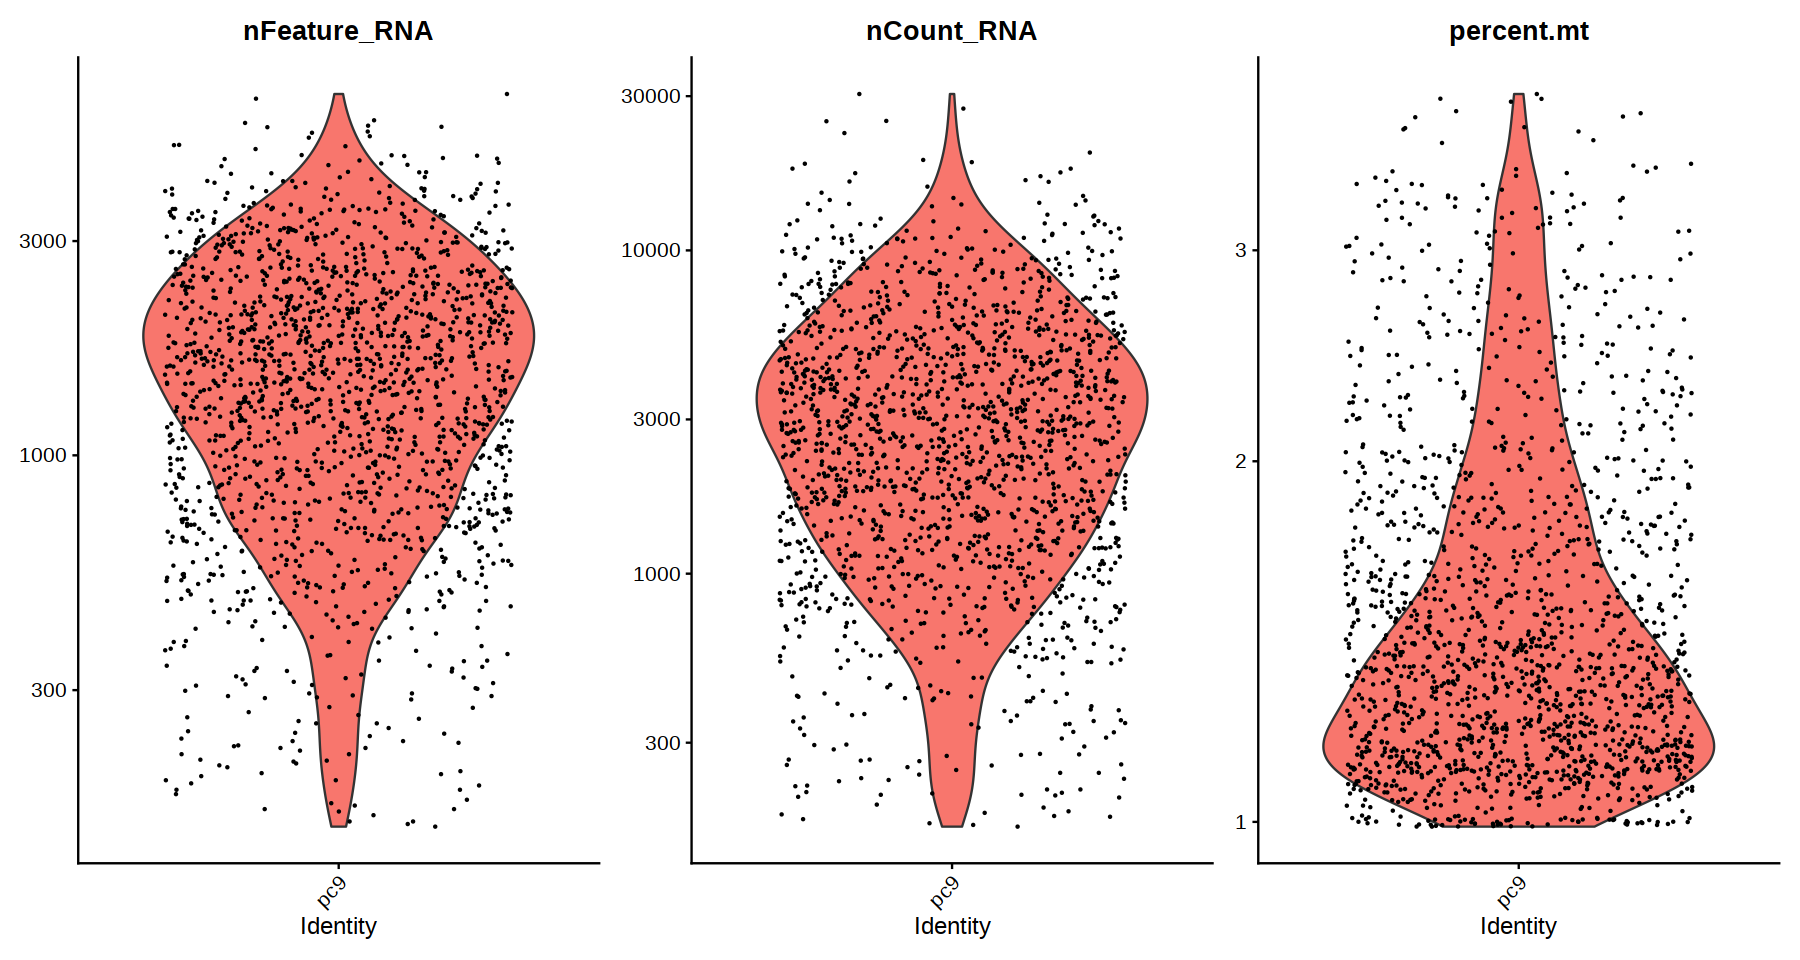

In [11]:
VlnPlot(mat.seurat,log = T, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0.2)

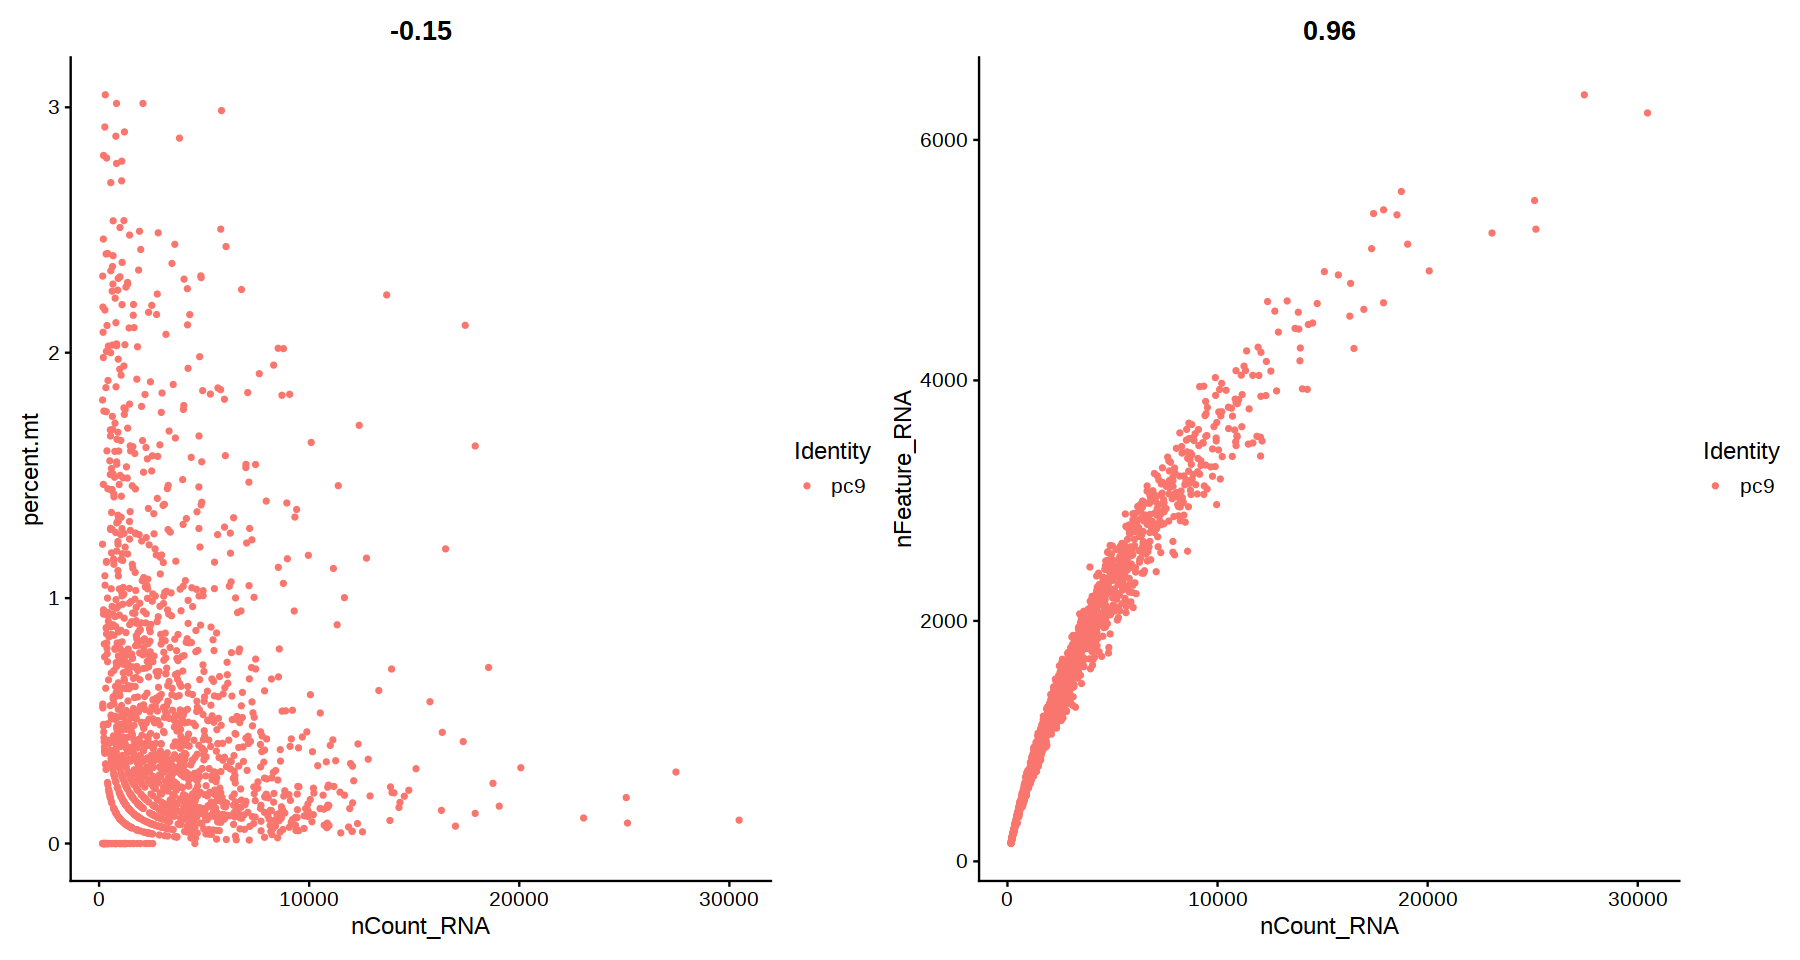

In [12]:
plot1 <- FeatureScatter(mat.seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(mat.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [13]:
#mat.seurat <- subset(mat.seurat, subset = nFeature_RNA > 100 & nFeature_RNA < 4000 & nCount_RNA>1000& percent.mt < 10)
mat.seurat <- subset(mat.seurat, subset = nFeature_RNA > 300 & nFeature_RNA < 3000 & nCount_RNA>1000)

In [14]:
mat.seurat

An object of class Seurat 
12639 features across 1205 samples within 1 assay 
Active assay: RNA (12639 features, 0 variable features)

In [15]:
mat.seurat <- NormalizeData(mat.seurat, normalization.method = "LogNormalize", scale.factor = 10000)

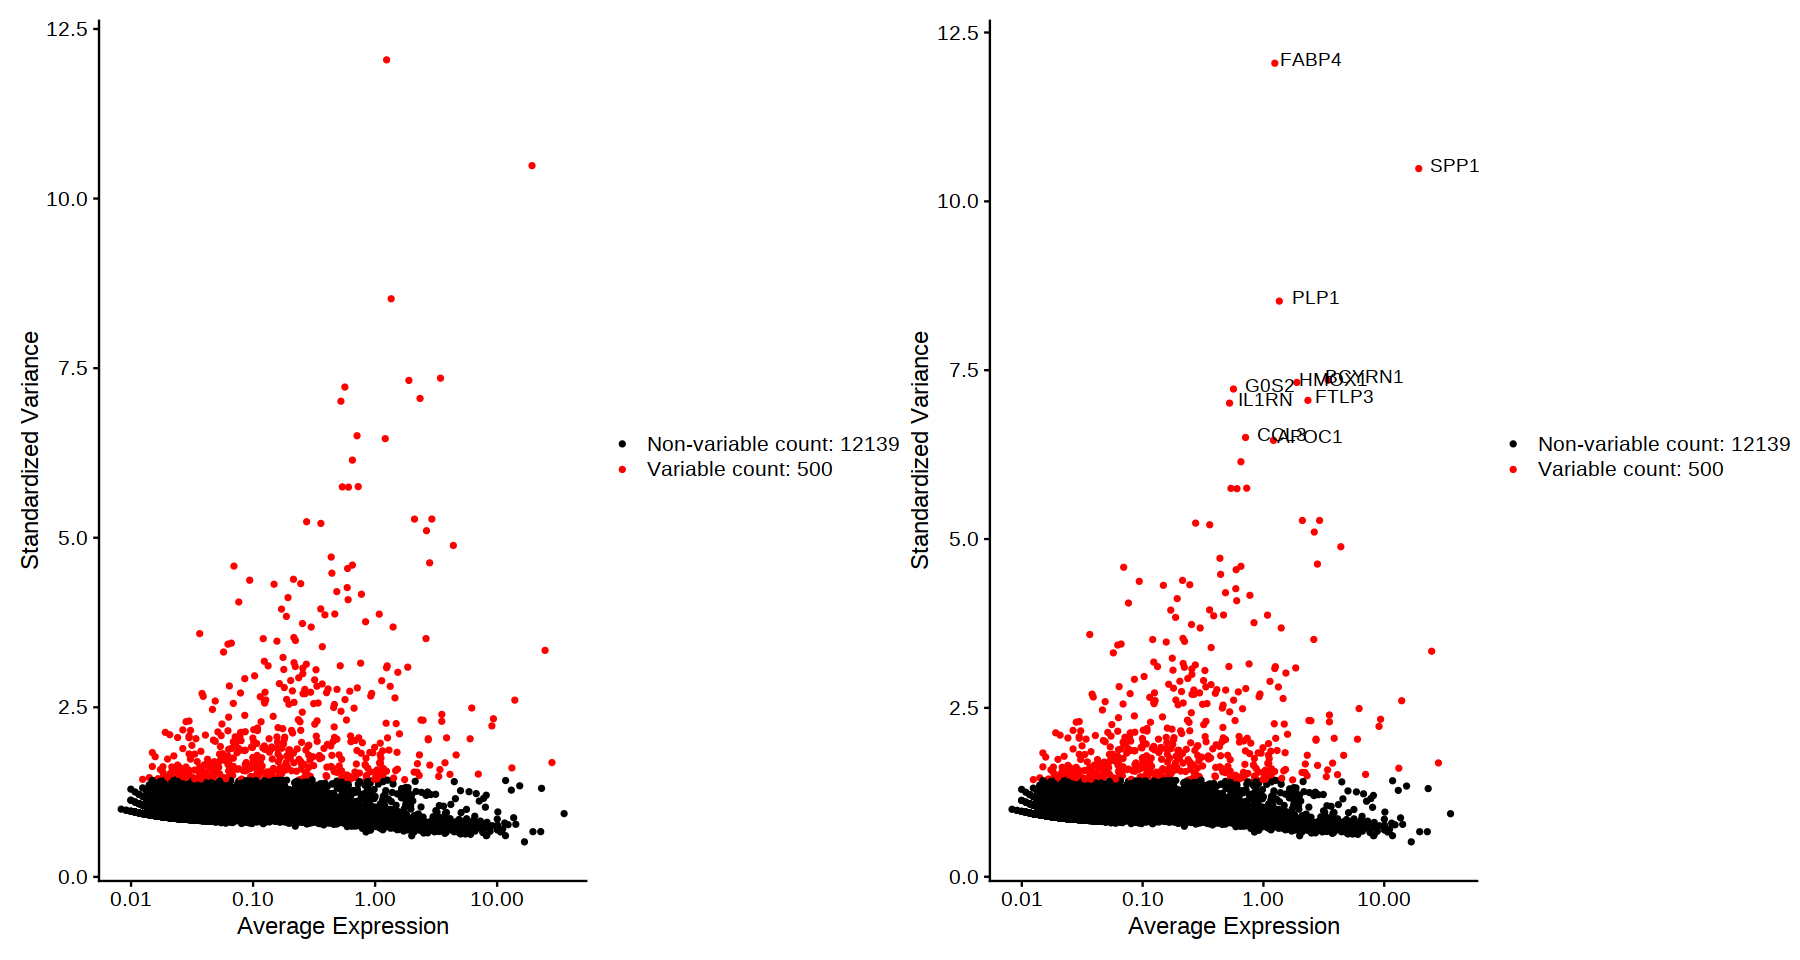

In [16]:
mat.seurat <- FindVariableFeatures(mat.seurat, selection.method = "vst", nfeatures = 500)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(mat.seurat), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(mat.seurat)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = FALSE)
plot1 + plot2

## do gene selection and PCA

In [21]:
genes <- VariableFeatures(mat.seurat)

Z <- as.matrix(mat.seurat@assays$RNA@data)

In [23]:
Z <- Z[genes,]
Z <- Z[rowSums(Z)>100,]

genes <- Z%>%rownames

Z <- Z%>%t%>%as.data.frame

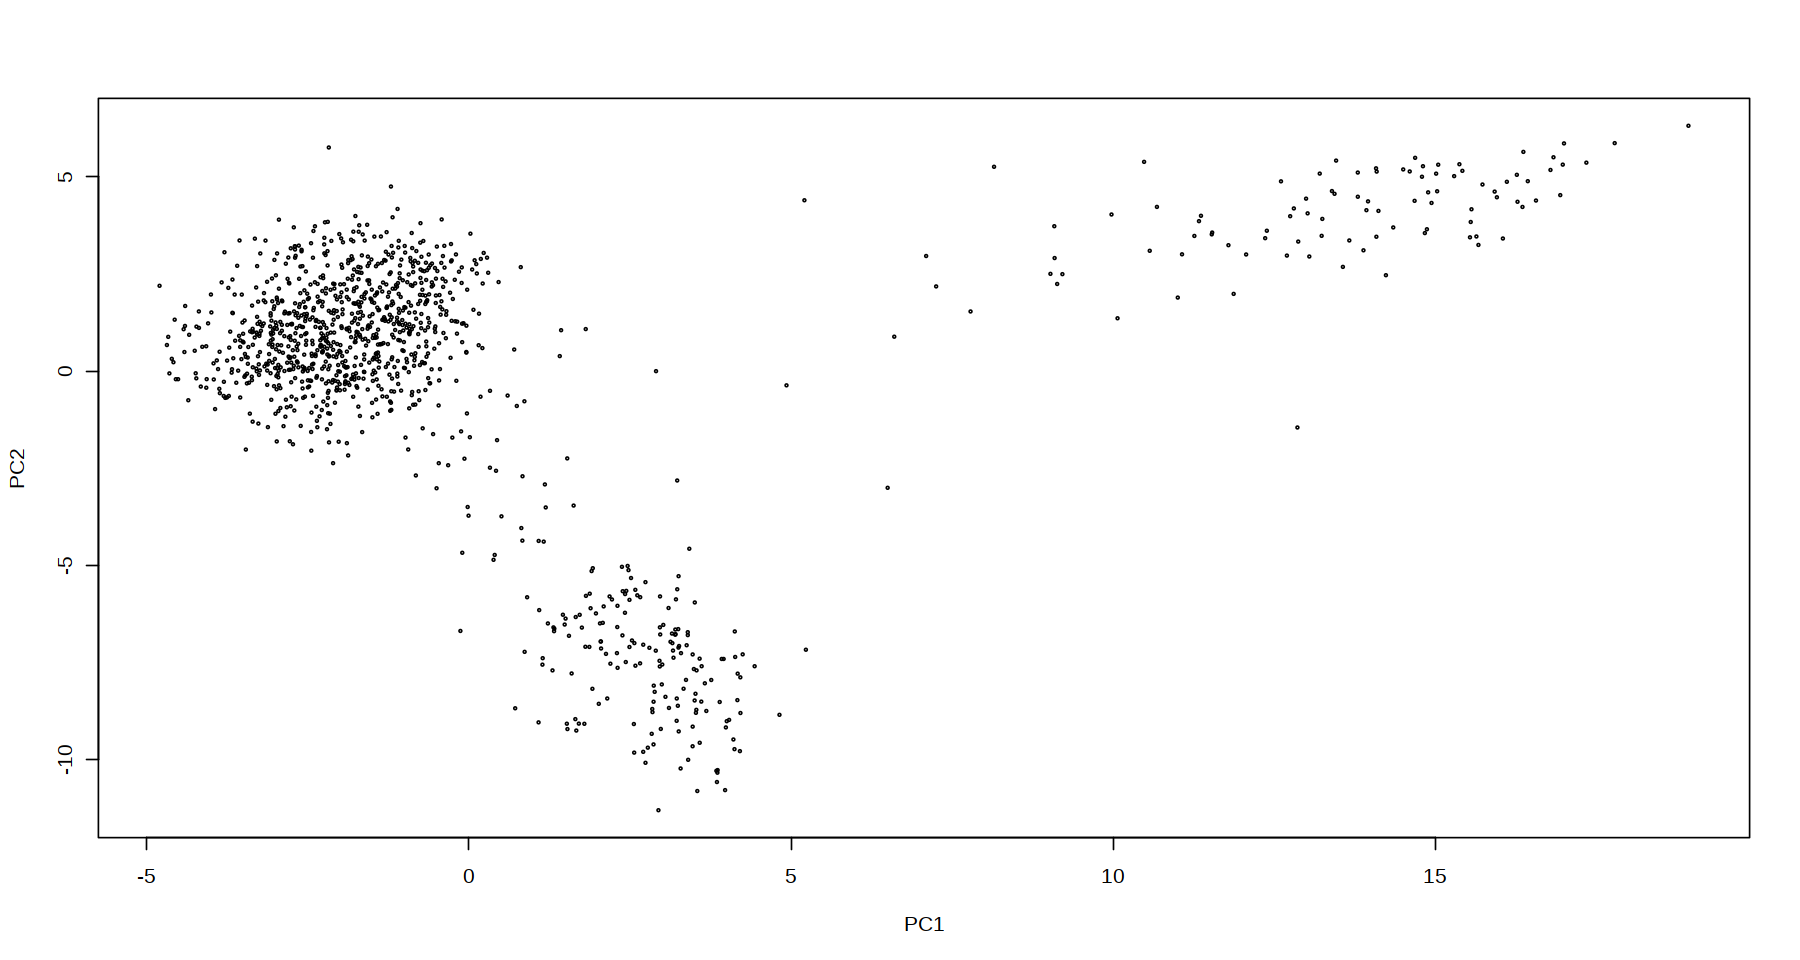

In [24]:
Z.center <- apply(Z,2,function(x){x-mean(x)})

Z.shift <- colMeans(Z)

Z_pca_results <- prcomp(Z.center, retx = TRUE, center = FALSE, scale. = FALSE, tol = NULL, rank. = NULL)

plot(Z_pca_results$x[,1:2],cex=0.2)

In [26]:
pc.number<-10

Z_PC_matrix <- Z_pca_results$x

Z_projection_genebypc <- Z_pca_results$rotation

In [27]:
save.image('P29_preprocessing.image')